<a href="https://colab.research.google.com/github/RAAHUL-S/Analysis-Projects/blob/main/Air_India_Flight_Crash_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install pandas matplotlib textblob
! python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from textblob import TextBlob

In [18]:
sns.set_theme(style="whitegrid")

**Data Setup**

In [40]:
df_common = pd.DataFrame({
    "Total_People_Onboard": [242],
    "Passengers": [230],
    "Crew": [12],
    "Death_Toll_Reported": [265],
    "Confirmed_Deaths": [241],
    "Survivors": [1],
    "Altitude_at_Crash_Feet": [425],
    "Captain_Flight_Hours": [8200],
    "Co_Pilot_Flight_Hours": [1100],
    "Required_Hours_for_Commander": [1500],
    "NDRF_Teams_Deployed": [6],
    "Bodies_Handed_Over": [6],
    "Assistance_Centers_Count": [4],
    "Airport_Helplines_Count": [3],
    "DNA_Control_Room_Helplines_Count": [2],
    "Days_for_DNA_Matching": [3]
})

**Timeline Of Events**

In [41]:
print("\n🕒 Timeline of Events:")
timeline = [
    "14:05 - Takeoff from Ahmedabad",
    "14:07 - Mayday issued due to engine trouble",
    "14:08 - Crash in Meghani area",
    "14:11 - First responders arrive",
    "14:20 - Fire control initiated"
]
for t in timeline:
    print("-", t)


🕒 Timeline of Events:
- 14:05 - Takeoff from Ahmedabad
- 14:07 - Mayday issued due to engine trouble
- 14:08 - Crash in Meghani area
- 14:11 - First responders arrive
- 14:20 - Fire control initiated


**Root Cause Hypotheses**

In [42]:
root_causes = pd.DataFrame({
    "Hypothesis": ["Engine failure", "Pilot error", "Maintenance lapse", "External interference"],
    "Evidence": ["Suspected", "Unlikely", "Flagged by DGCA", "Unknown"],
    "Confidence": ["High", "Low", "High", "Low"]
})
print("\n🧩 Root Cause Hypotheses:\n", root_causes)


🧩 Root Cause Hypotheses:
               Hypothesis         Evidence Confidence
0         Engine failure        Suspected       High
1            Pilot error         Unlikely        Low
2      Maintenance lapse  Flagged by DGCA       High
3  External interference          Unknown        Low


**Public Sentiment Analysis**

In [44]:
public_reactions = [
    "Thorough investigation needed. Air India must take responsibility.",
    "Missed the flight by 10 minutes. I’m numb after hearing about the crash.",
    "I was 40 seconds away. I saw everything. This should not have happened."
]
sentiment_scores = [TextBlob(text).sentiment.polarity for text in public_reactions]

**Analytics Summary**

In [45]:
survivor_rate = df_common["Survivors"][0] / df_common["Total_People_Onboard"][0] * 100
death_rate_confirmed = df_common["Confirmed_Deaths"][0] / df_common["Total_People_Onboard"][0] * 100
death_rate_reported = df_common["Death_Toll_Reported"][0] / df_common["Total_People_Onboard"][0] * 100
co_pilot_gap = df_common["Required_Hours_for_Commander"][0] - df_common["Co_Pilot_Flight_Hours"][0]
total_resources = df_common["NDRF_Teams_Deployed"][0] + df_common["Airport_Helplines_Count"][0] + df_common["DNA_Control_Room_Helplines_Count"][0]

analytics_summary = {
    "Survivor Rate (%)": round(survivor_rate, 2),
    "Death Rate (Confirmed %)": round(death_rate_confirmed, 2),
    "Death Rate (Reported %)": round(death_rate_reported, 2),
    "Co-Pilot Experience Gap (Hours)": co_pilot_gap,
    "Total Emergency Resources": total_resources
}

print("\n📊 Analytics Summary:")
for key, value in analytics_summary.items():
    print(f"{key}: {value}")


📊 Analytics Summary:
Survivor Rate (%): 0.41
Death Rate (Confirmed %): 99.59
Death Rate (Reported %): 109.5
Co-Pilot Experience Gap (Hours): 400
Total Emergency Resources: 11


# **Visualizations**
**Casuality Metrics**

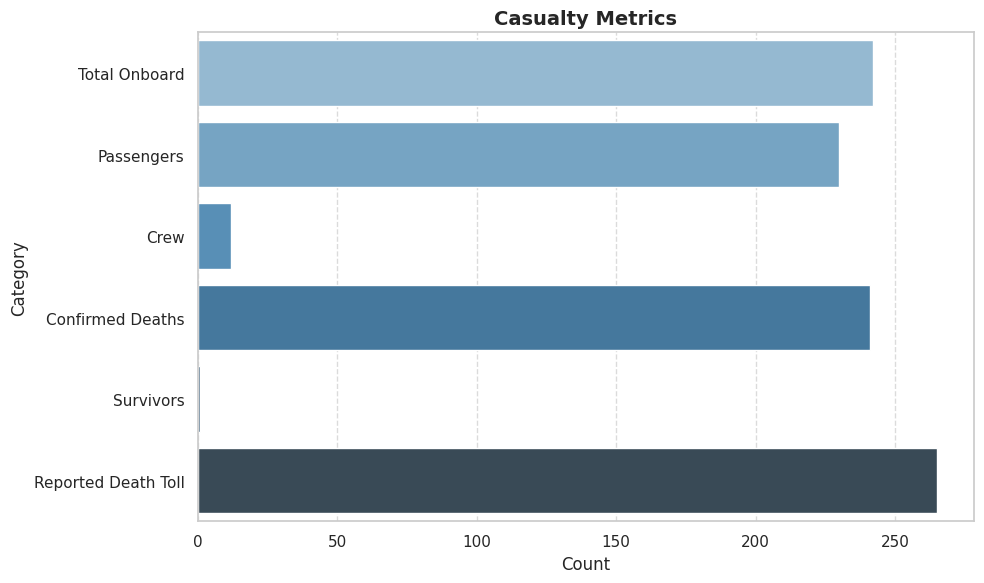

In [46]:
casualty_data = pd.DataFrame({
    "Category": ["Total Onboard", "Passengers", "Crew", "Confirmed Deaths", "Survivors", "Reported Death Toll"],
    "Count": [
        df_common["Total_People_Onboard"][0],
        df_common["Passengers"][0],
        df_common["Crew"][0],
        df_common["Confirmed_Deaths"][0],
        df_common["Survivors"][0],
        df_common["Death_Toll_Reported"][0]
    ]
})
casualty_data["Hue"] = casualty_data["Category"]
plt.figure(figsize=(10, 6))
sns.barplot(
    data=casualty_data,
    x="Count",
    y="Category",
    hue="Hue",
    palette="Blues_d",
    dodge=False,
    legend=False
)
plt.title("Casualty Metrics", fontsize=14, fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Category")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

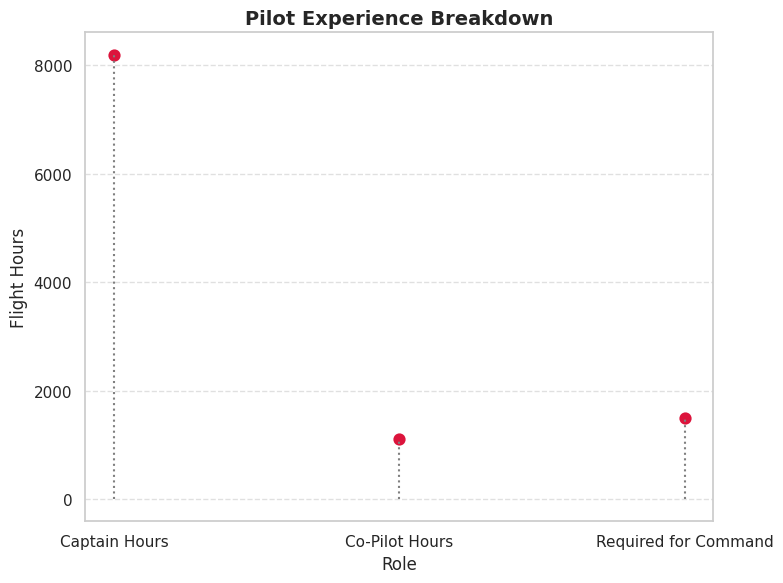

In [47]:
roles = ["Captain Hours", "Co-Pilot Hours", "Required for Command"]
values = [
    df_common["Captain_Flight_Hours"][0],
    df_common["Co_Pilot_Flight_Hours"][0],
    df_common["Required_Hours_for_Commander"][0]
]
pilot_df = pd.DataFrame({"Role": roles, "Flight Hours": values})
plt.figure(figsize=(8, 6))
sns.pointplot(
    data=pilot_df,
    x="Role",
    y="Flight Hours",
    markers="o",
    color="crimson",
    linestyle="none",
    err_kws={"linewidth": 0}
)
for i, val in enumerate(values):
    plt.vlines(x=i, ymin=0, ymax=val, colors="gray", linestyles="dotted")
plt.title("Pilot Experience Breakdown", fontsize=14, fontweight='bold')
plt.ylabel("Flight Hours")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

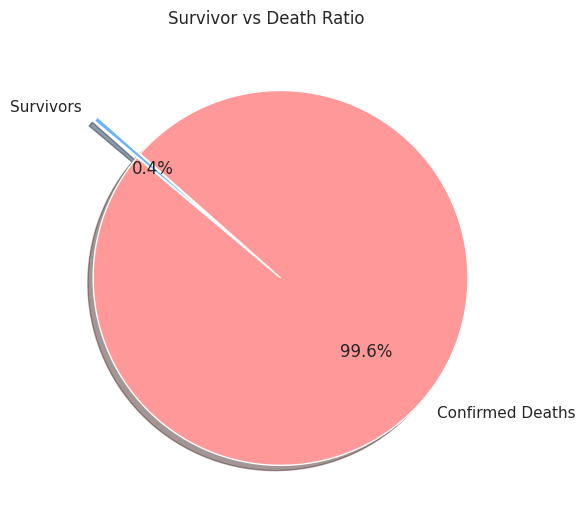

In [48]:
# Survivor vs Death Pie
plt.figure(figsize=(6, 6))
plt.pie(
    [df_common["Confirmed_Deaths"][0], df_common["Survivors"][0]],
    labels=["Confirmed Deaths", "Survivors"],
    colors=["#ff9999", "#66b3ff"],
    explode=(0.1, 0.2),
    autopct="%1.1f%%",
    startangle=140,
    shadow=True
)
plt.title("Survivor vs Death Ratio")
plt.tight_layout()
plt.show()

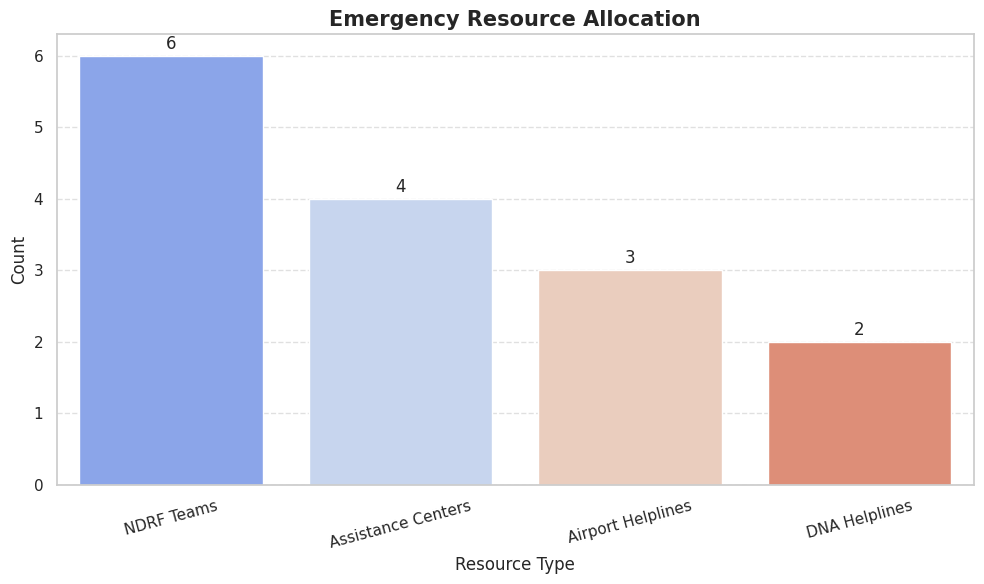

In [49]:
resource_df = pd.DataFrame({
    "Resource Type": ["NDRF Teams", "Assistance Centers", "Airport Helplines", "DNA Helplines"],
    "Count": [
        df_common["NDRF_Teams_Deployed"][0],
        df_common["Assistance_Centers_Count"][0],
        df_common["Airport_Helplines_Count"][0],
        df_common["DNA_Control_Room_Helplines_Count"][0]
    ]
})
plt.figure(figsize=(10, 6))
sns.barplot(
    data=resource_df,
    x="Resource Type",
    y="Count",
    hue="Resource Type",
    palette="coolwarm",
    legend=False
)
for index, row in resource_df.iterrows():
    plt.text(x=index, y=row["Count"] + 0.1, s=row["Count"], ha='center', fontsize=12)
plt.title("Emergency Resource Allocation", fontsize=15, fontweight="bold")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

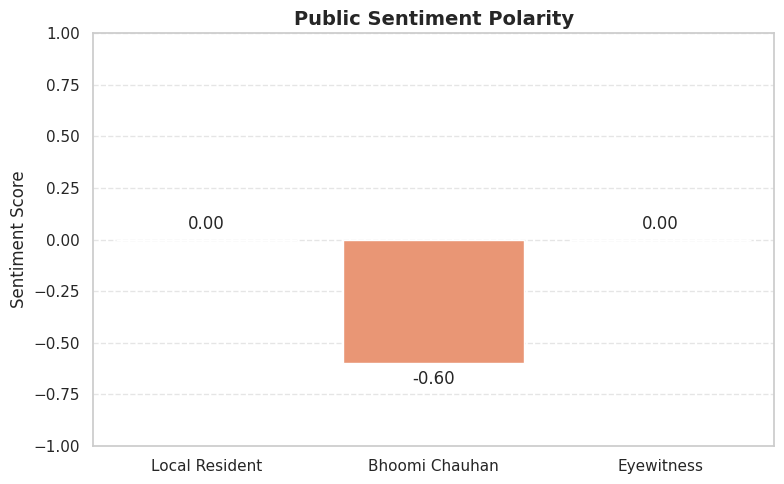

In [50]:
labels = ["Local Resident", "Bhoomi Chauhan", "Eyewitness"]
plt.figure(figsize=(8, 5))
sns.barplot(
    x=labels,
    y=sentiment_scores,
    hue=labels,
    palette="Set2",
    legend=False
)
for i, score in enumerate(sentiment_scores):
    plt.text(i, score + (0.05 if score >= 0 else -0.1), f"{score:.2f}", ha="center", fontsize=12)
plt.title("Public Sentiment Polarity", fontsize=14, fontweight="bold")
plt.ylabel("Sentiment Score")
plt.ylim(-1, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

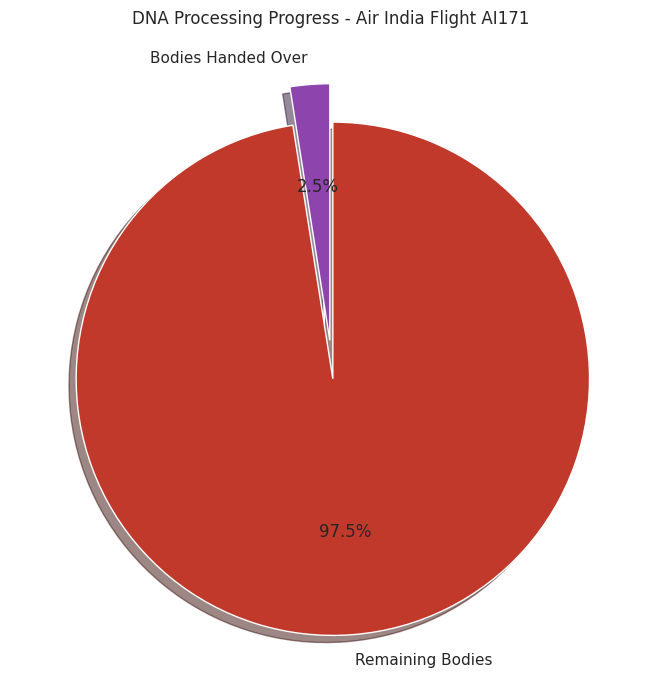

In [51]:
plt.figure(figsize=(7, 7))
labels = ["Bodies Handed Over", "Remaining Bodies"]
values = [
    df_common["Bodies_Handed_Over"][0],
    df_common["Confirmed_Deaths"][0] - df_common["Bodies_Handed_Over"][0]
]
colors = ["#8e44ad", "#c0392b"]
explode = (0.05, 0.1)
plt.pie(values, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90, shadow=True, explode=explode)
plt.title("DNA Processing Progress - Air India Flight AI171")
plt.tight_layout()
plt.show()